In [1]:
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, Dropout, Add
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.utils import np_utils

from tensorflow.keras.layers import Layer, InputSpec
from keras import backend as K

import numpy as np


In [2]:
import os
f=[] 
def listdirs(rootdir):
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            print(d)
            f.append(d)
            listdirs(d)
rootdir = 'lung_image_sets'
listdirs(rootdir)

lung_image_sets\lung_aca
lung_image_sets\lung_n
lung_image_sets\lung_scc


In [3]:
import pandas as pd
from pathlib import Path

image_dir_path = 'lung_image_sets/lung_n'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df1 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df1)


image_dir_path = 'lung_image_sets/lung_scc'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df2 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df2)
image_dir_path ='lung_image_sets/lung_aca'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.jpeg')]
df3 = pd.DataFrame(data=paths, columns=['Root', 'Type', 'Images'])
print(df3)

                 Root    Type          Images
0     lung_image_sets  lung_n     lungn1.jpeg
1     lung_image_sets  lung_n    lungn10.jpeg
2     lung_image_sets  lung_n   lungn100.jpeg
3     lung_image_sets  lung_n  lungn1000.jpeg
4     lung_image_sets  lung_n  lungn1001.jpeg
...               ...     ...             ...
4995  lung_image_sets  lung_n   lungn995.jpeg
4996  lung_image_sets  lung_n   lungn996.jpeg
4997  lung_image_sets  lung_n   lungn997.jpeg
4998  lung_image_sets  lung_n   lungn998.jpeg
4999  lung_image_sets  lung_n   lungn999.jpeg

[5000 rows x 3 columns]
                 Root      Type            Images
0     lung_image_sets  lung_scc     lungscc1.jpeg
1     lung_image_sets  lung_scc    lungscc10.jpeg
2     lung_image_sets  lung_scc   lungscc100.jpeg
3     lung_image_sets  lung_scc  lungscc1000.jpeg
4     lung_image_sets  lung_scc  lungscc1001.jpeg
...               ...       ...               ...
4995  lung_image_sets  lung_scc   lungscc995.jpeg
4996  lung_image_sets  

In [4]:
df = pd.concat([df1,df2,df3])
df.reset_index()

,index,Root,Type,Images
0,0,lung_image_sets,lung_n,lungn1.jpeg
1,1,lung_image_sets,lung_n,lungn10.jpeg
2,2,lung_image_sets,lung_n,lungn100.jpeg
3,3,lung_image_sets,lung_n,lungn1000.jpeg
4,4,lung_image_sets,lung_n,lungn1001.jpeg
...,...,...,...,...
14995,4995,lung_image_sets,lung_aca,lungaca995.jpeg
14996,4996,lung_image_sets,lung_aca,lungaca996.jpeg
14997,4997,lung_image_sets,lung_aca,lungaca997.jpeg
14998,4998,lung_image_sets,lung_aca,lungaca998.jpeg


In [5]:
import cv2
import os
from matplotlib import pyplot as plt

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (80,80))
            images.append(img)
            
    return np.array(images)

In [6]:
benign = load_images('lung_image_sets/lung_n')
mal_aca = load_images('lung_image_sets/lung_aca')
mal_scc = load_images('lung_image_sets/lung_scc')

In [7]:
print(f"Number of images for every class: BENIGN {benign.shape[0]}, ADENOCARCINOMAS {mal_aca.shape[0]}, SQUAMOS CELL CARCINOMAS {mal_scc.shape[0]}.")

print(f"Images shape: {benign[0].shape}.")

Number of images for every class: BENIGN 5000, ADENOCARCINOMAS 5000, SQUAMOS CELL CARCINOMAS 5000.
Images shape: (80, 80, 3).


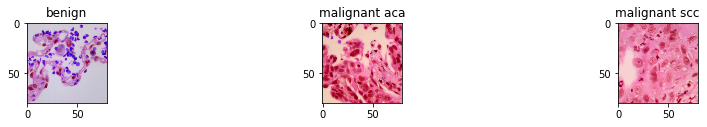

In [8]:
indices = [0, 40, 2300]

plt.figure(1, figsize=(15,5))
plt.grid(None)

for n, idx in enumerate(indices):
    plt.subplot(n+1, 3, 1) 
    plt.imshow(benign[idx])
    plt.title('benign')
    plt.subplot(n+1, 3, 2) 
    plt.imshow(mal_aca[idx])
    plt.title('malignant aca')
    plt.subplot(n+1, 3, 3) 
    plt.imshow(mal_scc[idx])
    plt.title('malignant scc')
plt.show()

In [9]:
samples = np.concatenate((benign, mal_aca, mal_scc))
labels = np.array(benign.shape[0] * [0] + mal_aca.shape[0] * [1] + mal_scc.shape[0] * [2])

In [10]:
print(f"Samples shape check: {samples.shape}.")
print(f"Labels shape check: {labels.shape}.")

Samples shape check: (15000, 80, 80, 3).
Labels shape check: (15000,).


In [11]:
indices = np.arange(samples.shape[0])
np.random.shuffle(indices)

samples = samples[indices]
labels = labels[indices]

# normalize pictures
samples = samples.astype('float32') / 255

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [13]:
Y_train = np_utils.to_categorical(y_train, 3)
Y_val = np_utils.to_categorical(y_val, 3)
Y_test = np_utils.to_categorical(y_test, 3)

print(Y_train[0])
print(f"Y_train shape after one hot encoding: {Y_val.shape}")
print(f"Y_train shape after one hot encoding: {X_val.shape}")

[0. 0. 1.]
Y_train shape after one hot encoding: (1500, 3)
Y_train shape after one hot encoding: (1500, 80, 80, 3)
